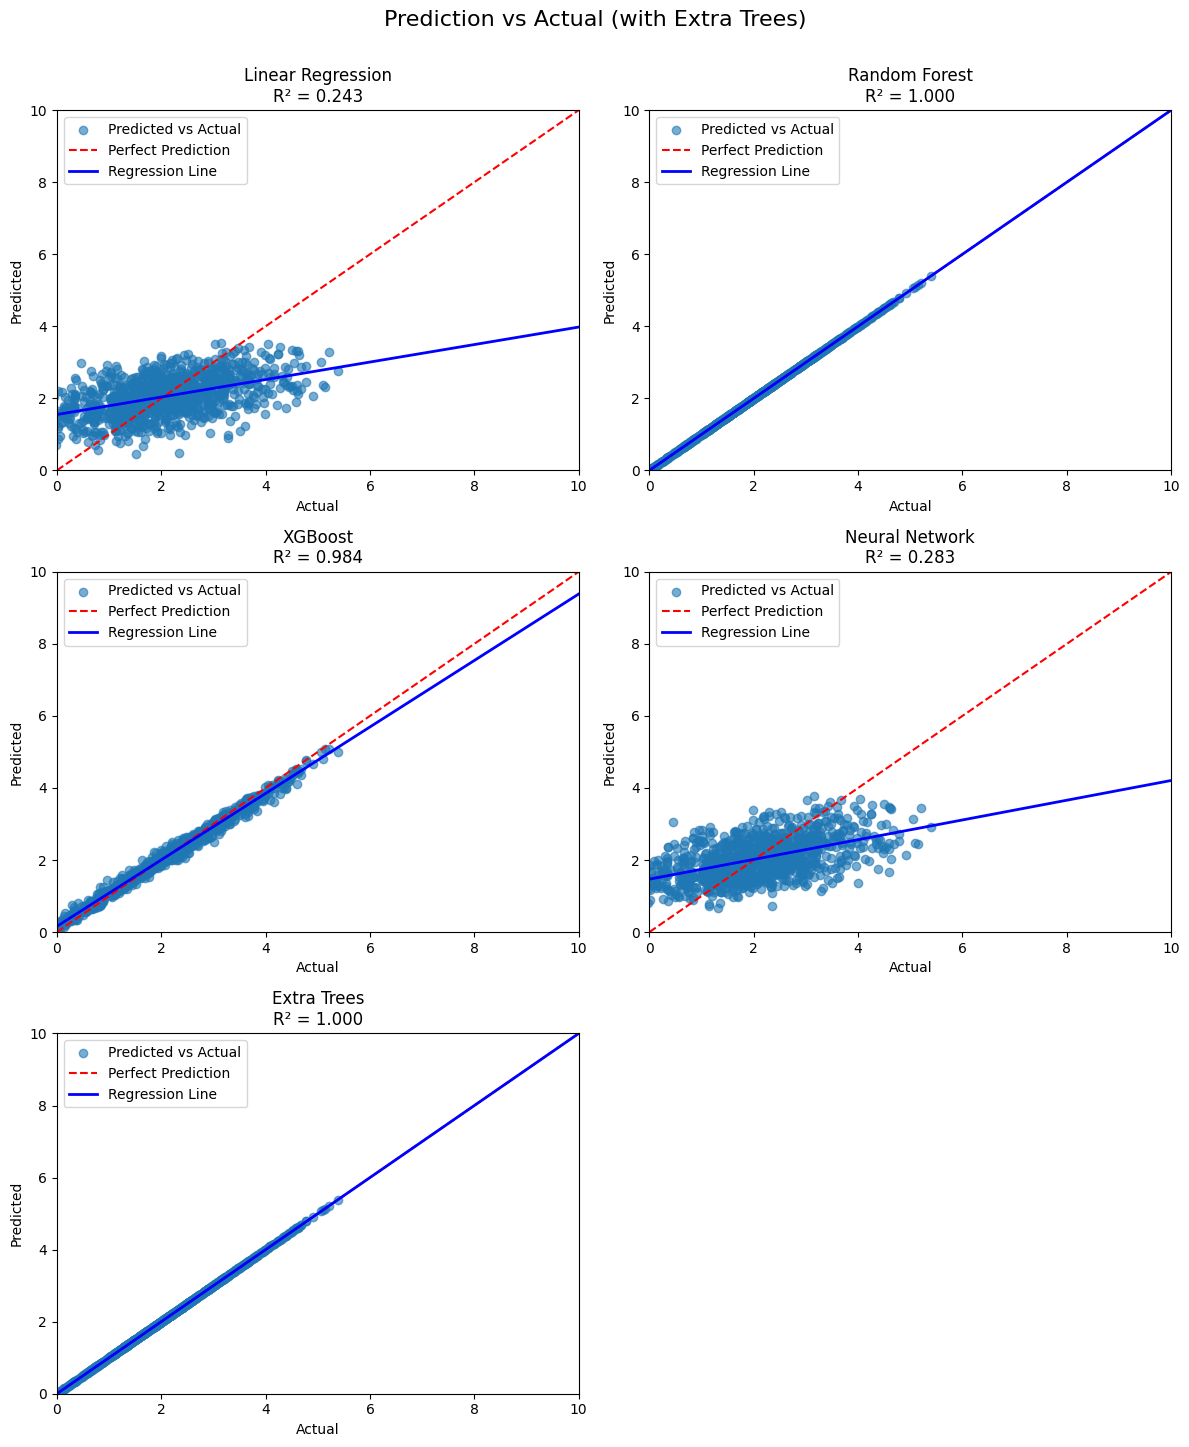

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import xgboost as xgb

np.random.seed(123)

# 1. 시뮬레이션 데이터 생성
n = 1000
p = 10
X = np.random.uniform(0, 1, size=(n, p))
beta = np.ones(p)
epsilon = np.random.normal(0, 1, size=n)
y = X @ beta + epsilon

# 2. 모델 정의
models = {
    "Linear Regression": LinearRegression(fit_intercept=True, positive=True),
    "Random Forest": RandomForestRegressor(n_estimators=100, bootstrap=False, random_state=0),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=0),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=50000, tol=0.0, random_state=0),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=0)
}

# 3. 모델 학습 및 예측
preds = {}
r2_scores = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    preds[name] = y_pred
    r2_scores[name] = r2_score(y, y_pred)

# 4. 시각화
fig, axes = plt.subplots(3, 2, figsize=(12, 14))
axes = axes.ravel()

for i, (name, y_pred) in enumerate(preds.items()):
    ax = axes[i]
    ax.scatter(y, y_pred, alpha=0.6, label="Predicted vs Actual")
    
    # 완벽 예측선
    ax.plot([0, 10], [0, 10], 'r--', label="Perfect Prediction")

    # 실제 회귀선
    fit = np.polyfit(y, y_pred, deg=1)
    ax.plot([0, 10], np.polyval(fit, [0, 10]), 'b-', linewidth=2, label="Regression Line")

    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title(f"{name}\nR² = {r2_scores[name]:.3f}")
    ax.legend()

# 빈 subplot 제거 (총 6개 중 5개만 사용)
if len(models) < len(axes):
    for i in range(len(models), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle("Prediction vs Actual (with Extra Trees)", fontsize=16, y=1.03)
plt.show()